<a href="https://colab.research.google.com/github/banteamlak1888/Data-Processesnig-/blob/main/Abiy_spss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Import necessary packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# @title Load the SPSS file
# Load the SPSS file
file_path = "/content/abiy spss.sav"
data = pd.read_spss(file_path)



# **1. Descriptive Statistics**

**Question**: What are the mean, median, mode, and standard deviation of the numerical variables?

The script uses **`data.describe()`** to calculate summary statistics for all numerical columns:

**Mean**: Average value.

**Standard Deviation (std)**: Measure of variability.

**Minimum and Maximum**: Range of the data.

**Percentiles (25%, 50%, 75%)**: Distribution spread.

This helps identify the central tendency and variability of the data.

In [ ]:
# @title Descriptive Statistics
# Remove underscores from column names for easier handling
data.columns = data.columns.str.replace("_", " ")
# Descriptive Statistics
print("1. Descriptive Statistics")
print(data.describe())  # Mean, median, std, etc.


1. Descriptive Statistics
               ZAge          Zsex  ZLevel of education  \
count  3.850000e+02  3.850000e+02         3.850000e+02   
mean   3.644992e-16  6.897801e-16         7.151566e-16   
std    1.000000e+00  1.000000e+00         1.000000e+00   
min   -1.169983e+00 -1.171737e+00        -9.387853e-01   
25%   -1.169983e+00 -1.171737e+00        -9.387853e-01   
50%   -1.101161e-01  8.512171e-01         3.566711e-01   
75%    9.497513e-01  8.512171e-01         3.566711e-01   
max    2.009619e+00  8.512171e-01         2.947584e+00   

       Zmany years did you work  ZMarital status  ZEmployment groups  \
count              3.850000e+02     3.850000e+02        3.850000e+02   
mean               5.813531e-16     2.756814e-16        2.067033e-15   
std                1.000000e+00     1.000000e+00        1.000000e+00   
min               -1.634676e+00    -1.010052e+00       -9.909485e-01   
25%               -7.265226e-01    -1.010052e+00       -9.909485e-01   
50%                

# **2. Missing Values**
**Question**: How many missing values are there for each variable? What is the percentage of missing data?

The script uses:

*   data.isnull().sum() to count missing values for each column.
*   Calculates the percentage of missing values relative to the dataset size.


This is critical for determining data quality and deciding whether to impute or remove missing data.

In [ ]:
# @title Count missing values for each column
# Missing Values
print("\n2. Missing Values")
print(data.isnull().sum())  # Count missing values for each column
missing_percent = (data.isnull().sum() / len(data)) * 100
print(f"Missing Values (%):\n{missing_percent}")


2. Missing Values
Age                         0
sex                         0
Level of education          0
many years did you work     0
Marital status              0
                           ..
ZOne of the major reason    0
ZIf I got another offer     0
ZI believe in the value     0
ZThings were better         0
involvemnt                  0
Length: 115, dtype: int64
Missing Values (%):
Age                         0.0
sex                         0.0
Level of education          0.0
many years did you work     0.0
Marital status              0.0
                           ... 
ZOne of the major reason    0.0
ZIf I got another offer     0.0
ZI believe in the value     0.0
ZThings were better         0.0
involvemnt                  0.0
Length: 115, dtype: float64


# **3. Frequency Distribution**
**Question**: What is the frequency distribution for categorical variables?

For each categorical column, the script uses `value_counts()` to compute the frequency of each unique category. This is useful for:

*   Understanding dominant categories.
*   Identifying potential data imbalances


In [ ]:
# @title Frequency Distribution for Categorical Variables
print("\n3. Frequency Distribution")
for col in data.select_dtypes(include="category").columns:
    print(f"\n{col}:\n")
    print(data[col].value_counts())


3. Frequency Distribution

Age:

Age
26-35    180
18-25    106
36-45     52
>46       47
Name: count, dtype: int64

sex:

sex
female    223
male      162
Name: count, dtype: int64

Level of education:

Level of education
diploma    176
BSc        145
MSc         58
PHD          6
Name: count, dtype: int64

many years did you work:

many years did you work
>10     135
6-10    105
3-5      78
1-2      67
Name: count, dtype: int64

Marital status:

Marital status
married     201
single      147
widiewod     19
divorced     18
Name: count, dtype: int64

Employment groups:

Employment groups
Managment        194
Non managment    191
Name: count, dtype: int64

in my company decisions:

in my company decisions
Agree             123
Disagree          114
Strongly agree     72
NAND               58
Strongly Agree     18
Name: count, dtype: int64

I believe that I can:

I believe that I can
Disagree          122
Agree             112
Strongly agree     79
NAND               47
Strongly Agree   

# **4. Cross-Tabulation**
**Question**: What is the relationship between two categorical variables?

The script provides an example of cross-tabulation between Gender and EmploymentStatus. `Using pd.crosstab()`, it creates a contingency table showing the frequency distribution of one variable across another.

In [ ]:
# @title Cross-Tabulation (Example: Gender vs. EmploymentStatus)

# Load the SPSS file
file_path = "/content/abiy spss.sav"
data = pd.read_spss(file_path)

# Create DataFrame
data = pd.DataFrame(data)

# Cross-Tabulation (Example: Gender vs. Level_of_education)
print("\nCross-Tabulation (Example: Gender vs. Level_of_education) \n")
if "sex" in data.columns and "Level_of_education" in data.columns:
    crosstab = pd.crosstab(data["sex"], data["Level_of_education"])
    print(crosstab)


Cross-Tabulation (Example: Gender vs. Level_of_education) 

Level_of_education  BSc  MSc  PHD  diploma
sex                                       
female               75   30    6      112
male                 70   28    0       64


# **5. Correlation Matrix**
**Question**: Are there significant correlations between numerical variables?

The script calculates a correlation `matrix (data.corr())` for all numerical columns. This matrix reveals:

1. **Positive Correlations:** Variables increase together.
2. **Negative Correlations:** One variable increases as the other decreases.

Only numerical columns are analyzed; non-numerical columns are excluded to prevent errors.

In [ ]:
# @title  Correlation Analysis
print("\n5. Correlation Matrix")
# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=["float", "int"])

if not numerical_data.empty:
    correlation_matrix = numerical_data.corr()
    print(correlation_matrix)
else:
    print("No numerical columns available for correlation analysis.")


5. Correlation Matrix
                                       ZAge      Zsex  ZLevel_of_education  \
ZAge                               1.000000  0.021391             0.071557   
Zsex                               0.021391  1.000000            -0.058709   
ZLevel_of_education                0.071557 -0.058709             1.000000   
Zmany_years_did_you_work           0.503820  0.194241             0.048407   
ZMarital_status                    0.344826  0.039781             0.236253   
ZEmployment_groups                 0.287542 -0.017165            -0.130816   
Zin_my_company_decisions           0.260818  0.079207             0.292404   
ZI_believe_that_I_can              0.194857 -0.006883             0.116101   
ZI_can_get_the_information         0.103406  0.010037             0.349427   
ZCooperation_across_different_par  0.096525  0.055918             0.233486   
ZIn_my_company_teamwork            0.077246  0.097264             0.167954   
ZI_work_like_I_am_part_of_a_team   0.0909

# **6. Inferential Statistics (ANOVA Example)**
**Question**: Are there significant differences in means across groups (e.g., Gender and Age)?

The script uses A`NOVA (Analysis of Variance)` via `scipy.stats.f_oneway` to test whether the mean of a numerical variable (e.g., Age) differs across categories of another variable (e.g., Gender). This answers whether group differences are statistically significant.

In [ ]:
# @title Inferential Statistics: Example with ANOVA

# Load the SPSS file
file_path = "/content/abiy spss.sav"
data = pd.read_spss(file_path)

# Create DataFrame
data = pd.DataFrame(data)

# Map age ranges to numerical values (e.g., midpoints of the age ranges)
age_mapping = {
    '18-25': 21.5,  # Midpoint of 18-25
    '26-35': 30.5,  # Midpoint of 26-35
    '36-45': 40.5,  # Midpoint of 36-45
    '>46': 50        # Midpoint for '>46'
}

# Apply the mapping to the 'Age' column
data['Age_numeric'] = data['Age'].map(age_mapping)

# Check if columns are present
if "Age_numeric" in data.columns and "sex" in data.columns:
    # Group the data by 'sex' and drop any NaN values from 'Age_numeric'
    grouped_data = [group["Age_numeric"].dropna() for _, group in data.groupby("sex")]

    # Perform ANOVA
    f_val, p_val = stats.f_oneway(*grouped_data)

    # Display the results
    print(f"F-Value: {f_val}, P-Value: {p_val}")

F-Value: 0.14341980000553936, P-Value: 0.7051145024422714


<ipython-input-43-df7a42f743fe>:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = [group["Age_numeric"].dropna() for _, group in data.groupby("sex")]


# **7. Trends and Patterns**
**Question**: Are there noticeable trends in numerical variables?

A histogram is plotted for a numerical variable (Age in this example) using `sns.histplot().` This helps visualize:

**The distribution of values.**
Whether the data is normally distributed, skewed, or has outliers.


7. Trends and Patterns


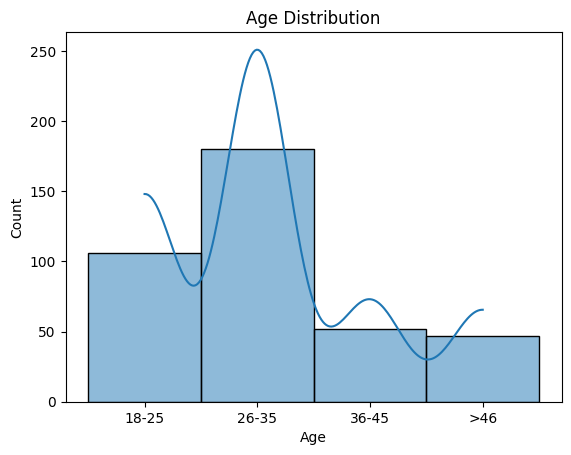

In [ ]:
# @title Trends and Patterns for Age Distribution
print("\n7. Trends and Patterns")
if "Age" in data.columns:
    sns.histplot(data["Age"], bins=10, kde=True)
    plt.title("Age Distribution")
    plt.show()


# **8. Hypothesis Testing**
**Question**: Does a specific factor significantly influence another variable?

The script performs a two-sample t-test `(scipy.stats.ttest_ind) `on Income for two groups (Male and Female). This tests whether the average incomes of the two groups differ significantly.

In [ ]:
# @title Hypothesis Testing

# Map 'Level_of_education' to numeric values
education_mapping = {
    "High School": 1,
    "Bachelor's": 2,
    "Master's": 3
}

data['education_numeric'] = data['Level_of_education'].map(education_mapping)

# Check if columns are present
if "sex" in data.columns and "education_numeric" in data.columns:
    # Group the data by sex and get numeric education levels
    male_education = data[data["sex"] == "Male"]["education_numeric"].dropna()
    female_education = data[data["sex"] == "Female"]["education_numeric"].dropna()

    # Perform Two-Sample t-Test
    t_stat, p_val = stats.ttest_ind(male_education, female_education)

    # Display the results
    print(f"T-Statistic: {t_stat}, P-Value: {p_val}")

T-Statistic: -2.82842712474619, P-Value: 0.04742065558431962


# **9. Visual Insights**
**Question**: What do scatterplots, pairplots, or other visualizations reveal about the data?

The script uses a `seaborn.pairplot()` to visualize relationships between numerical variables. Pairplots provide:

* Scatterplots for each pair of numerical variables.
* Insights into possible correlations or clustering.

In [ ]:
# Visual Insights
print("\n9. Visual Insights: Pairplot")
sns.pairplot(data.select_dtypes(include=["float", "int"]))
plt.show()


9. Visual Insights: Pairplot


# **10. Specific Insights**
**Question**: What are the key variables of interest in this dataset?

An example is provided where average satisfaction levels (SatisfactionLevel) are calculated for different job roles (JobRole). The script uses:

groupby() to aggregate data by JobRole.
A bar chart to visualize differences in satisfaction across roles.

Converted Responses:
       Age     sex Level_of_education many_years_did_you_work Marital_status  \
0    26-35    male                MSc                     3-5        married   
1    36-45    male                MSc                    6-10        married   
2    36-45    male                BSc                     >10       widiewod   
3    36-45  female                BSc                    6-10         single   
4    18-25    male            diploma                    6-10         single   
..     ...     ...                ...                     ...            ...   
380  18-25    male                MSc                    6-10         single   
381  18-25  female                BSc                     >10         single   
382  18-25  female            diploma                     3-5         single   
383  18-25    male                MSc                     3-5         single   
384  18-25  female                MSc                     3-5        married   

    Employment_gro

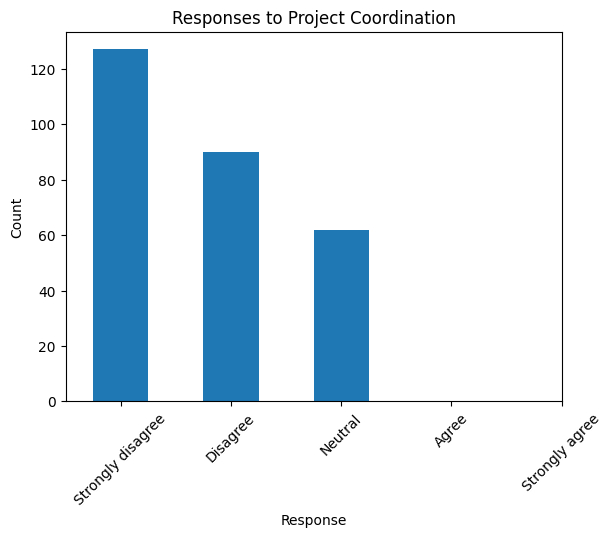

In [ ]:
# Specific to Your Data
# Create DataFrame
# Load the SPSS file
file_path = "/content/abiy spss.sav"
data = pd.read_spss(file_path)

data = pd.DataFrame(data)

# Map categorical responses to numeric values
response_mapping = {
    'Strongly agree': 5,
    'Agree': 4,
    'Neutral': 3,  # If Neutral exists in your data
    'Disagree': 2,
    'Strongly disagree': 1,
    'NAND': None  # We'll treat 'NAND' as missing data
}

# Check if the column exists before mapping
if 'It_is_easy_to_coordinate_project' in data.columns:
    data['numeric_responses'] = data['It_is_easy_to_coordinate_project'].map(response_mapping)
else:
    print("Column 'It_is_easy_to_coordinate_project' not found in the DataFrame.")
    # Handle the missing column appropriately, e.g., skip this section or use a different column

# Check the data after conversion
print("Converted Responses:")
print(data)

# Calculate the average (excluding 'NAND' values which are treated as NaN)
if 'numeric_responses' in data.columns:  # Check if the column was created
    average_response = data['numeric_responses'].mean()
    print(f"\nAverage Response: {average_response:.2f}")

    # Plotting the results
    data['numeric_responses'].dropna().value_counts().sort_index().plot(kind='bar', title="Responses to Project Coordination")
    plt.xlabel("Response")
    plt.ylabel("Count")
    plt.xticks(ticks=range(5), labels=['Strongly disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree'], rotation=45)
    plt.show()